# PCA with NMIST dataset

In [1]:
from sklearn.decomposition import PCA

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [112]:
from sklearn.datasets import load_digits
(data, label) = load_digits(as_frame=True, return_X_y=True)

In [135]:
data.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


## Covariance calculation

In [22]:
M = data.to_numpy()

In [23]:
n, p = M.shape

In [24]:
print("M shape: ", M.shape)

M shape:  (1797, 64)


In [25]:
print("M.T shape: ", M.T.shape)

M.T shape:  (64, 1797)


In [139]:
cov = np.cov(M.T, ddof = 1)
M1 = M.copy()
M1 = M1 - np.mean(M1, axis=0)
cov_matrix = np.dot(M1.T, M1) / (n-1)

In [138]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_matrix)
print(f"eigenvaluesL {eigen_vals}")
print("")
print(f"sum of eigenvalues, explained variance: {eigen_vals.sum()}")

eigenvaluesL [1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00]

sum of ei

## Using SKLEARN to apply PCA Transformation

In [154]:
M3 = M.copy()

In [155]:
pca = PCA()
Mtransformed = pca.fit_transform(M)
print(f"eigenvalues, explained variance: {pca.explained_variance_}")
two_eig = pca.explained_variance_[:2].sum()
print("")
tot_explained_var = pca.explained_variance_.sum()
print(f"variance explained for first 2: {two_eig}  {two_eig/pca.explained_variance_.sum() * 100}%")

eigenvalues, explained variance: [1.79006930e+02 1.63717747e+02 1.41788439e+02 1.01100375e+02
 6.95131656e+01 5.91085249e+01 5.18845391e+01 4.40151067e+01
 4.03109953e+01 3.70117984e+01 2.85190412e+01 2.73211698e+01
 2.19014881e+01 2.13243565e+01 1.76367222e+01 1.69468639e+01
 1.58513899e+01 1.50044602e+01 1.22344732e+01 1.08868593e+01
 1.06935663e+01 9.58259779e+00 9.22640260e+00 8.69036872e+00
 8.36561190e+00 7.16577961e+00 6.91973881e+00 6.19295508e+00
 5.88499123e+00 5.15586690e+00 4.49129656e+00 4.24687799e+00
 4.04743883e+00 3.94340334e+00 3.70647245e+00 3.53165306e+00
 3.08457409e+00 2.73780002e+00 2.67210896e+00 2.54170563e+00
 2.28298744e+00 1.90724229e+00 1.81716569e+00 1.68996439e+00
 1.40197220e+00 1.29221888e+00 1.15893419e+00 9.31220008e-01
 6.69850594e-01 4.86065217e-01 2.52350432e-01 9.91527944e-02
 6.31307848e-02 6.07377581e-02 3.96662297e-02 1.49505636e-02
 8.47307261e-03 3.62365957e-03 1.27705113e-03 6.61270906e-04
 4.12223305e-04 1.71361503e-16 0.00000000e+00 0.0000

### Using n_components

In [156]:
pca = PCA(n_components = 2)
Mtransformed = pca.fit_transform(M3)
print(f"eigenvalues, explained variance for 2 components: {pca.explained_variance_}")
print("")
two_eig = pca.explained_variance_[:2].sum()
print("")
print(f"explained_variance_ratio_: {pca.explained_variance_ratio_}")
print("")
print(f"singular_values_: {pca.singular_values_}")
print("")
print(f"get_feature_names_out: {pca.get_params()}")

eigenvalues, explained variance for 2 components: [179.0069301  163.71774688]


explained_variance_ratio_: [0.14890594 0.13618771]

singular_values_: [567.0065665  542.25185421]

get_feature_names_out: {'copy': True, 'iterated_power': 'auto', 'n_components': 2, 'n_oversamples': 10, 'power_iteration_normalizer': 'auto', 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}


In [157]:
print(f"PCA_1: {pca.explained_variance_[0]}")
print(f"PCA_2: {pca.explained_variance_[1]}")

PCA_1: 179.00693009797206
PCA_2: 163.7177468816773


In [158]:
pc1_pct = (pca.explained_variance_[0]/eigen_vals.sum())* 100

In [159]:
pc2_pct = (pca.explained_variance_[1]/tot_explained_var)* 100

In [160]:
Mtransformed.shape

(1797, 2)

In [161]:
print(f"PCA_1: {pca.components_[0]}")
print(f"PCA_2: {pca.components_[1]}")

PCA_1: [ 0.00000000e+00 -1.73094651e-02 -2.23428835e-01 -1.35913304e-01
 -3.30323092e-02 -9.66340844e-02 -8.32943805e-03  2.26900082e-03
 -3.20516495e-04 -1.19308905e-01 -2.44451676e-01  1.48512745e-01
 -4.67319410e-02 -2.17740744e-01 -1.48136776e-02  4.47779518e-03
 -4.94136398e-05 -7.95419375e-02  8.33951454e-02  2.15915342e-01
 -1.72126801e-01 -1.63712098e-01  2.86444452e-02  4.23251803e-03
  9.85488574e-05  6.42319144e-02  2.54093316e-01 -3.56771026e-02
 -2.09462569e-01 -4.31311420e-02  5.13118688e-02  2.13422732e-04
  0.00000000e+00  1.59950883e-01  3.68690774e-01  1.64406827e-01
  8.52007908e-02  3.72982855e-02  2.15866980e-02  0.00000000e+00
  1.28865585e-03  1.06945287e-01  3.03067457e-01  2.47813041e-01
  2.09637296e-01  1.22325219e-02 -3.69458497e-02  1.61485028e-03
  6.93023548e-04 -8.35144239e-03 -5.58598986e-02  9.30534169e-02
  1.07387720e-01 -1.37734565e-01 -6.32879466e-02  9.61671077e-04
  9.55079131e-06 -1.40786840e-02 -2.35675488e-01 -1.41225588e-01
 -9.15964553e-03 -

In [162]:
list(label)

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 9,
 5,
 5,
 6,
 5,
 0,
 9,
 8,
 9,
 8,
 4,
 1,
 7,
 7,
 3,
 5,
 1,
 0,
 0,
 2,
 2,
 7,
 8,
 2,
 0,
 1,
 2,
 6,
 3,
 3,
 7,
 3,
 3,
 4,
 6,
 6,
 6,
 4,
 9,
 1,
 5,
 0,
 9,
 5,
 2,
 8,
 2,
 0,
 0,
 1,
 7,
 6,
 3,
 2,
 1,
 7,
 4,
 6,
 3,
 1,
 3,
 9,
 1,
 7,
 6,
 8,
 4,
 3,
 1,
 4,
 0,
 5,
 3,
 6,
 9,
 6,
 1,
 7,
 5,
 4,
 4,
 7,
 2,
 8,
 2,
 2,
 5,
 7,
 9,
 5,
 4,
 8,
 8,
 4,
 9,
 0,
 8,
 9,
 8,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 0,
 9,
 5,
 5,
 6,
 5,
 0,
 9,
 8,
 9,
 8,
 4,
 1,
 7,
 7,
 3,
 5,
 1,
 0,
 0,
 2,
 2,
 7,
 8,
 2,
 0,
 1,
 2,
 6,
 3,
 3,
 7,
 3,
 3,
 4,
 6,
 6,
 6,
 4,
 9,
 1,
 5,
 0,
 9,
 5,
 2,
 8,
 2,
 0,
 0,
 1,
 7,
 6,
 3,
 2,
 1,
 7,
 3,
 1,
 3,
 9,
 1,
 7,
 6,
 8,
 4,
 3,
 1,
 4,
 0,
 5,
 3,
 6,
 9,
 6,
 1,
 7,
 5,
 4,
 4,
 7,
 2,
 8,
 2,
 2,
 5,
 5,
 4,
 8,
 8,


In [163]:
Mtransformed = pd.DataFrame(Mtransformed, columns = ['pc1','pc2'])
Mtransformed['labels'] = label

In [164]:
Mtransformed

,pc1,pc2,labels
0,-1.259466,-21.274883,0
1,7.957611,20.768699,1
2,6.991923,9.955986,2
3,-15.906105,-3.332464,3
4,23.306867,-4.269061,4
...,...,...,...
1792,-14.606628,-13.344124,9
1793,6.464574,-20.567299,0
1794,10.801284,6.960252,8
1795,-4.872100,-12.423954,9


## Plotting

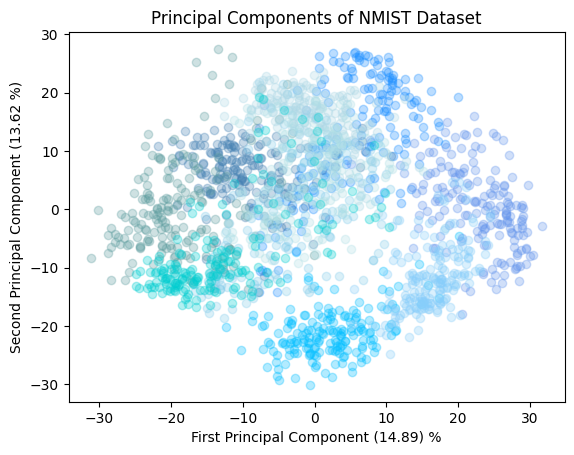

In [166]:
#aLL from dim 0 and all from dim 1
colors = {
    0: "#00BFFF",   
    1: "#1E90FF",  
    2: "#4682B4",   
    3: "#5F9EA0",  
    4: "#6495ED",   
    5: "#87CEEB",   
    6: "#87CEFA",   
    7: "#ADD8E6",   
    8: "#B0E0E6",   
    9: "#00CED1"    
}


for digit in colors:
    i = Mtransformed[Mtransformed['labels']==int(digit)]
    color =  colors[digit]
    plt.scatter(i['pc1'], i['pc2'], alpha=0.3, c = colors[digit])
 
plt.gca().set(
    
    title="Principal Components of NMIST Dataset",
    xlabel = f"First Principal Component ({pc1_pct:.2f}) %",
    ylabel = f"Second Principal Component ({pc2_pct:.2f} %)"
    )
 
plt.show()

    